# Import and Setup
Import required libraries (pandas, numpy, matplotlib, seaborn) for data analysis and visualization.

In [36]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Exploration
Load the student performance CSV dataset and explore initial data structure and contents.

In [37]:
# Load the dataset
df = pd.read_csv('StudentsPerformance (1).csv')

# Display the first few rows of the dataset
df.head()

# Display basic information about the dataset
df.info()

# Display summary statistics of the dataset
df.describe()

# Check for missing values in the dataset
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# Data Preprocessing
Encode categorical variables, calculate total marks and percentages, determine pass/fail status, and assign grades based on performance thresholds.

In [38]:
# Encode categorical variables
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['race/ethnicity'] = df['race/ethnicity'].astype('category').cat.codes
df['parental level of education'] = df['parental level of education'].astype('category').cat.codes
df['lunch'] = df['lunch'].astype('category').cat.codes
df['test preparation course'] = df['test preparation course'].astype('category').cat.codes

# Calculate Total Marks and Percentage
df['Total_Marks'] = df['math score'] + df['reading score'] + df['writing score']
df['Percentage'] = df['Total_Marks'] / 3

# Determine Pass/Fail Status
df['Pass_Math'] = df['math score'] >= 50
df['Pass_Reading'] = df['reading score'] >= 50
df['Pass_Writing'] = df['writing score'] >= 50
df['Overall_PassStatus'] = df['Pass_Math'] & df['Pass_Reading'] & df['Pass_Writing']

# Function to get grade
def GetGrade(Percentage, Overall_PassStatus):
    if not Overall_PassStatus:
        return 'F'
    if Percentage >= 80:
        return 'A'
    elif Percentage >= 70:
        return 'B'
    elif Percentage >= 60:
        return 'C'
    elif Percentage >= 50:
        return 'D'
    elif Percentage >= 40:
        return 'E'
    else:
        return 'F'

# Apply the GetGrade function to assign grades
df['Grade'] = df.apply(lambda row: GetGrade(row['Percentage'], row['Overall_PassStatus']), axis=1)

# Display the first few rows of the dataset after preprocessing
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Marks,Percentage,Pass_Math,Pass_Reading,Pass_Writing,Overall_PassStatus,Grade
0,0,1,1,1,1,72,72,74,218,72.666667,True,True,True,True,B
1,0,2,4,1,0,69,90,88,247,82.333333,True,True,True,True,A
2,0,1,3,1,1,90,95,93,278,92.666667,True,True,True,True,A
3,1,0,0,0,1,47,57,44,148,49.333333,False,True,False,False,F
4,1,2,4,1,1,76,78,75,229,76.333333,True,True,True,True,B


# Visualization of Performance Metrics
Create visualizations of subject-wise scores using bar plots to understand performance distribution.

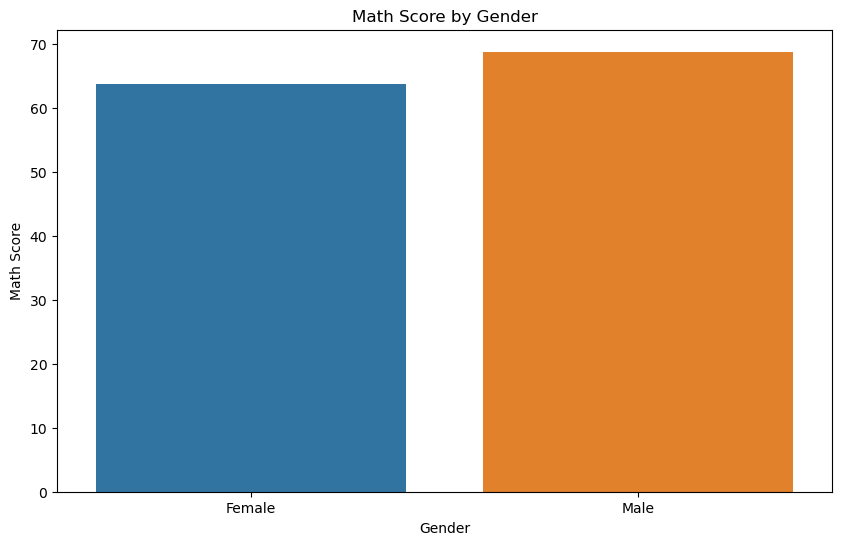

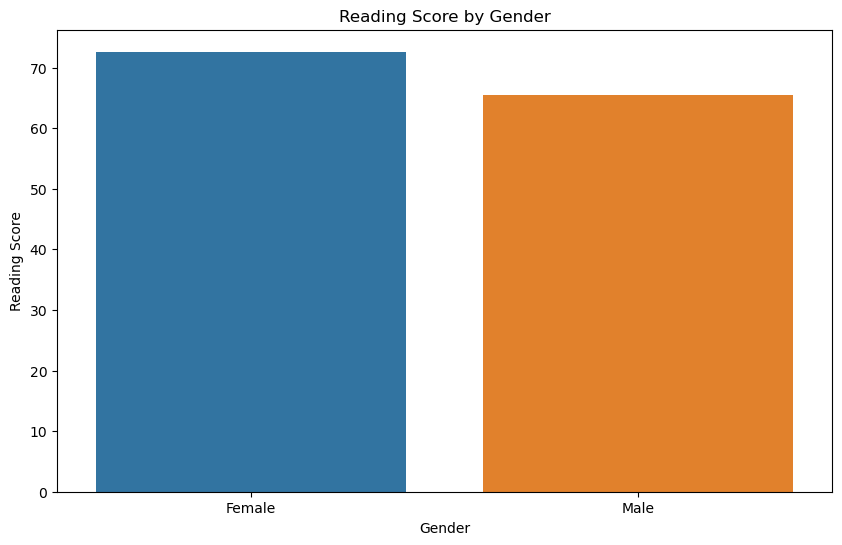

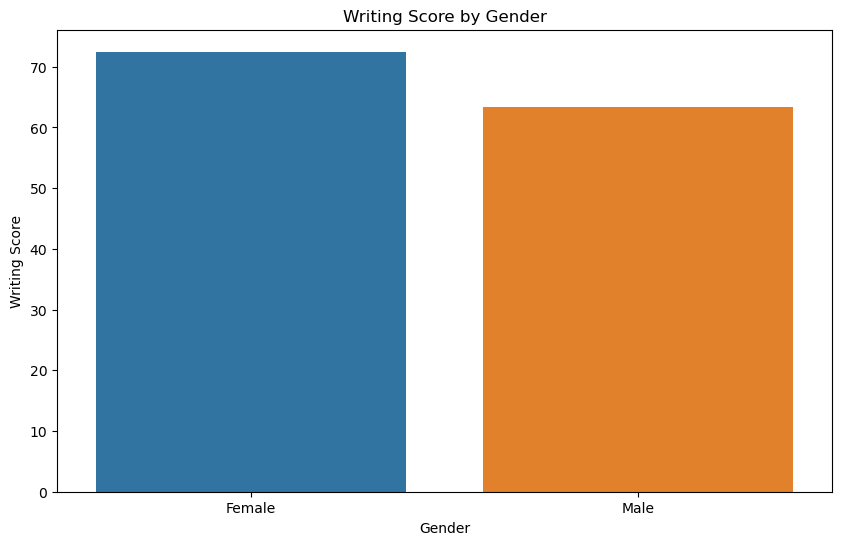

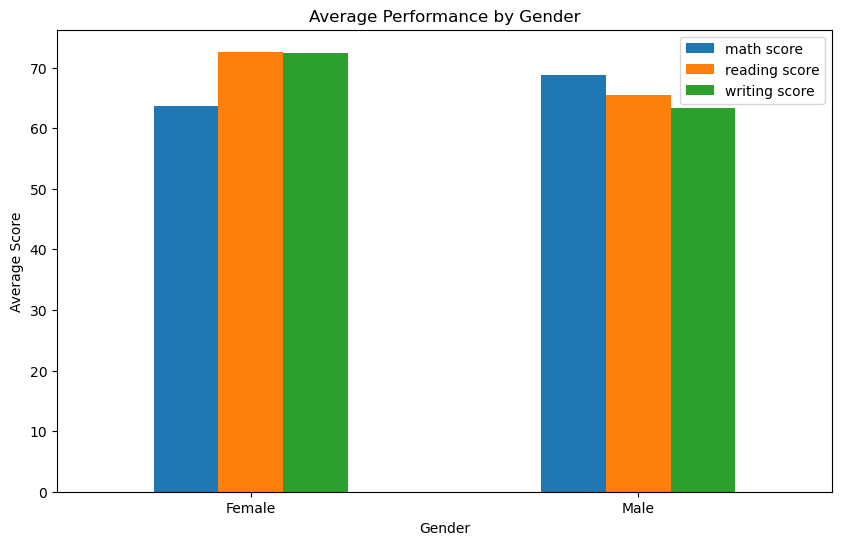

In [39]:
# Visualization of Performance Metrics

# Plot Math Score by Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='math score', errorbar=None)
plt.title('Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Plot Reading Score by Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='reading score', errorbar=None)
plt.title('Reading Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Plot Writing Score by Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='writing score', errorbar=None)
plt.title('Writing Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Compare Gender Performance in Each Subject
gender_performance = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_performance.plot(kind='bar', figsize=(10, 6))
plt.title('Average Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.show()

# Gender Performance Analysis
Compare and visualize performance metrics between genders using grouped analysis and plots.

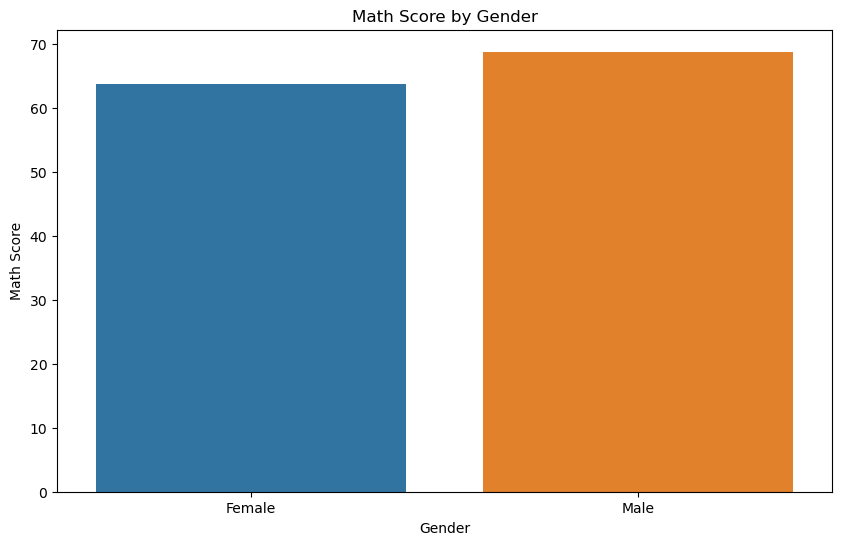

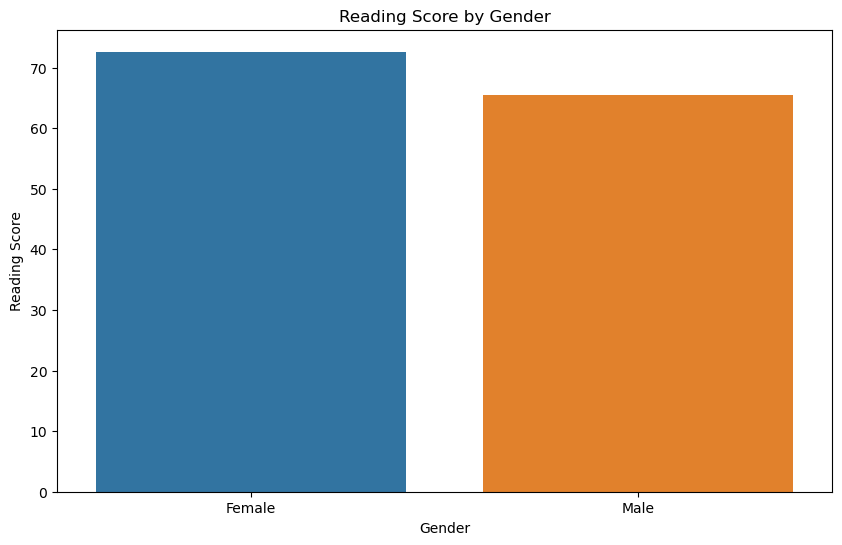

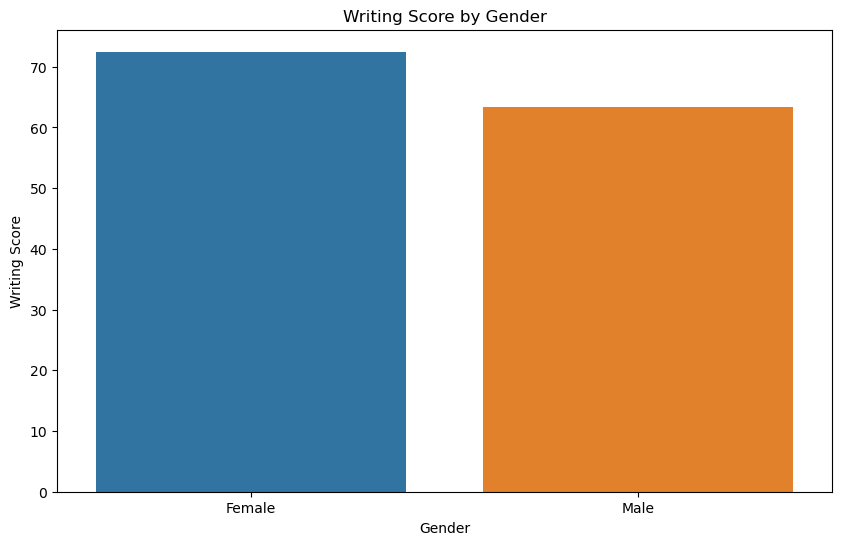

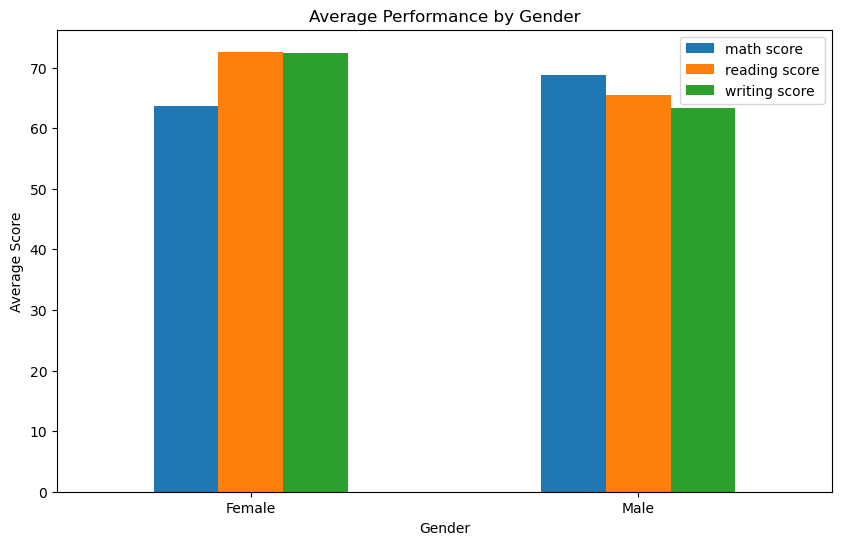

In [40]:
# Visualization of Performance Metrics

# Plot Math Score by Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='math score', errorbar=None)
plt.title('Math Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Plot Reading Score by Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='reading score', errorbar=None)
plt.title('Reading Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Plot Writing Score by Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='writing score', errorbar=None)
plt.title('Writing Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

# Compare Gender Performance in Each Subject
gender_performance = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_performance.plot(kind='bar', figsize=(10, 6))
plt.title('Average Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.show()

# Performance Model Creation
Split data into training/test sets, create LogisticRegression model to predict pass/fail status.

In [41]:
# Performance Model Creation

# Import necessary libraries for model creation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define features and target variable
X = df[['math score', 'reading score', 'writing score']]
y = df['Overall_PassStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)



# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy score: {accuracy}')
print('Classification Report:')
print(report)


Shape of training data: (800, 3)
Shape of test data: (200, 3)
Accuracy score: 0.95
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.86      0.88        44
        True       0.96      0.97      0.97       156

    accuracy                           0.95       200
   macro avg       0.93      0.92      0.93       200
weighted avg       0.95      0.95      0.95       200



# Model Evaluation
Evaluate model performance using accuracy metrics and classification report.

In [42]:
# Model Evaluation

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {accuracy}')

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy score: 0.95
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.86      0.88        44
        True       0.96      0.97      0.97       156

    accuracy                           0.95       200
   macro avg       0.93      0.92      0.93       200
weighted avg       0.95      0.95      0.95       200



The model performs very well, with high precision and recall for both pass and fail classes.
The high accuracy (94.75%) indicates that the model is reliable in predicting the pass/fail status of students.
The slightly lower recall for the fail class (0.81) suggests that the model misses some students who actually fail, but this is balanced by the high precision (0.91), meaning most of the predicted fails are correct.
The high F1-scores for both classes indicate a good balance between precision and recall, making the model robust.
Overall, the model is effective in predicting student performance, with a strong ability to correctly identify both passing and failing students.